# Part I : Data Collection - REE API

The objective of this session is to understand how data can be retrieved from specific sources as REE API.

To do so, we will use `requests` library and `json` libraries for Python. These libraries are very famous and common python libraries to deal with http request and json file serialization.

Later on, we will use specific libraries for plotting as `matplotlib` and `datetime`.

In [2034]:
# import requests library
import requests 
import json
# import plotting library
import matplotlib
import matplotlib.pyplot as plt 
from datetime import date, datetime, timedelta


### Create the request

As we have seen before, when we work with APIs, we have to know and hold the URL of the exposed **endpoint** of the server where the information we want is stored. We have to start writing the whole http request to be made. Following concepts explained in class, this will include: an http method, the desired endpoint, headers and parameters.
Reading the available API documentation (mandatory) available here https://www.ree.es/es/apidatos you can understand that only GET request can be done.

Let's therefore write in our script the desired headers/parameters.
We need to write also the folder/section we want to access. Note that we can have the same endpoint but different sections from where to get the information. 

Most of the times, we need to add some headers to our requests that are required to get the information. The most important one is the **Authorization**, which corresponds to our ID to access that API. 

The following code is created only to facilitate the process of the API request generation. Endpoints, archives and headers are always provided in the API documentation, which have to be read.

In [2037]:
endpoint = 'https://apidatos.ree.es'

get_archives = '/en/datos/mercados/precios-mercados-tiempo-real'

headers = {'Accept': 'application/json',
           'Content-Type': 'application/json',
           'Host': 'apidatos.ree.es'}

params = {'start_date': '2021-11-01T00:00', 'end_date': '2021-11-02T00:00', 'time_trunc':'hour'}

We are now looking at data regarding the **precios-mercados-tiempo-real** (look at the request archive above). We will find out what this archives contains once we have transferred the data.


We can write now the request according to the `requests` library and its `get` method. That is how you create a GET HTTP method with this library, which is very intuitive and easy to use.

In [2040]:
response = requests.get(endpoint+get_archives, headers=headers, params=params)

After that, we can check if the request is correct or not according to the response we get from the API. 

In [2042]:
response

<Response [200]>

In this case, the response we get is **200**, meaning that is has been accepted and the connection is established. 
There are different codes that tell us which is our connection status between us and the API. Please, have a look yourself at the possible outcomes of http request. 

In [2044]:
status = response.status_code

#Check the status code
if status < 200:
    print('informational')
    # If the status code is 200, treat the information.
elif status >= 200 and status < 300:
    print('Connection is established')
    #okBehavior(response) # runs the function to get list of archives
elif status >= 300 and status < 400:
    print('redirection')
elif status >= 400 and status < 500:
    print('client error')
else:
    print('server error')

Connection is established


### Access the data

The data are sent under the form of a json file. By calling the `json` method on the request object, we can access and store the transferred data. Have a look at all the IDs available for us to obtain data. 

In [2047]:
# accessing data by means of a json object
data_json = response.json()

In [2048]:
data_json

{'data': {'type': 'Precios mercado peninsular en tiempo real',
  'id': 'mer13',
  'attributes': {'title': 'Precios mercado peninsular en tiempo real',
   'last-update': '2023-05-19T08:50:06.000+02:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'MISS'}}},
 'included': [{'type': 'PVPC',
   'id': '1001',
   'groupId': None,
   'attributes': {'title': 'PVPC',
    'description': None,
    'color': '#ffcf09',
    'type': None,
    'magnitude': 'price',
    'composite': False,
    'last-update': '2023-05-19T08:50:06.000+02:00',
    'values': [{'value': 116.38,
      'percentage': 0.5974025974025974,
      'datetime': '2021-11-01T00:00:00.000+01:00'},
     {'value': 90.29,
      'percentage': 0.6211902304781561,
      'datetime': '2021-11-01T01:00:00.000+01:00'},
     {'value': 78.75,
      'percentage': 0.6419662509170946,
      'datetime': '2021-11-01T02:00:00.000+01:00'},
     {'value': 55.28,
      'percentage': 0.7148583990689255,
      'datetime': '2021-11-01T03:00:0

For a better visualization of the json content, you can use this tool (https://jsonformatter.curiousconcept.com). This helps in understanding the structure of the json file and access the desired data.
You can find out using the suggested tool that the response to the request contain the desired substructures.

The **data** struct contains meta-data about your request.
The **included** struct contains the actual data. 
This contains 2 additional substructure:
    
    - **PVPC** or Voluntary price for the small consumer - Precio Voluntario Pequeno Consumidor (€/MWh)
    - "Precio mercado spot" or **Spot market price** (€/MWh)

- PVPC is the price of energy for the REGULATED market
- Spot market price is the price of energy for the FREE market

Let's try to extract both. 

NB: The spot market price can be also called the "Day-Ahead Market" price (DAM) which is contracted the same day for the next one. Prices are defined for each hour.

To access the actual values it is needed to access some more substructures ("attributes" and "values")

In [2051]:
pvpc_data = data_json['included'][0]
spot_market_data = data_json['included'][1]

pvpc_values = pvpc_data['attributes']['values']
spot_values = spot_market_data['attributes']['values']


### Store the data on local variables

Let's focus on the spot market price first.

In [2054]:
spot_values

[{'value': 78.43,
  'percentage': 0.4025974025974026,
  'datetime': '2021-11-01T00:00:00.000+01:00'},
 {'value': 55.06,
  'percentage': 0.3788097695218438,
  'datetime': '2021-11-01T01:00:00.000+01:00'},
 {'value': 43.92,
  'percentage': 0.35803374908290536,
  'datetime': '2021-11-01T02:00:00.000+01:00'},
 {'value': 22.05,
  'percentage': 0.28514160093107466,
  'datetime': '2021-11-01T03:00:00.000+01:00'},
 {'value': 15,
  'percentage': 0.23768024084931072,
  'datetime': '2021-11-01T04:00:00.000+01:00'},
 {'value': 41.09,
  'percentage': 0.34396450694793235,
  'datetime': '2021-11-01T05:00:00.000+01:00'},
 {'value': 58.29,
  'percentage': 0.37681815243390004,
  'datetime': '2021-11-01T06:00:00.000+01:00'},
 {'value': 77.54,
  'percentage': 0.40259605399792314,
  'datetime': '2021-11-01T07:00:00.000+01:00'},
 {'value': 88.81,
  'percentage': 0.41282015525496213,
  'datetime': '2021-11-01T08:00:00.000+01:00'},
 {'value': 85.42,
  'percentage': 0.4139568693966561,
  'datetime': '2021-11-0

Create local structure in your python environment and fill them with data

In [2056]:
prices = []
times = []

In [2057]:
for data_point in spot_values:
    #print(time_period['value'])
    prices.append(data_point['value'])
    times.append(data_point['datetime'])
    print(f"Spot price at {data_point['datetime']} is {data_point['value']} €/MWh")

Spot price at 2021-11-01T00:00:00.000+01:00 is 78.43 €/MWh
Spot price at 2021-11-01T01:00:00.000+01:00 is 55.06 €/MWh
Spot price at 2021-11-01T02:00:00.000+01:00 is 43.92 €/MWh
Spot price at 2021-11-01T03:00:00.000+01:00 is 22.05 €/MWh
Spot price at 2021-11-01T04:00:00.000+01:00 is 15 €/MWh
Spot price at 2021-11-01T05:00:00.000+01:00 is 41.09 €/MWh
Spot price at 2021-11-01T06:00:00.000+01:00 is 58.29 €/MWh
Spot price at 2021-11-01T07:00:00.000+01:00 is 77.54 €/MWh
Spot price at 2021-11-01T08:00:00.000+01:00 is 88.81 €/MWh
Spot price at 2021-11-01T09:00:00.000+01:00 is 85.42 €/MWh
Spot price at 2021-11-01T10:00:00.000+01:00 is 83.2 €/MWh
Spot price at 2021-11-01T11:00:00.000+01:00 is 78.31 €/MWh
Spot price at 2021-11-01T12:00:00.000+01:00 is 78.98 €/MWh
Spot price at 2021-11-01T13:00:00.000+01:00 is 70.62 €/MWh
Spot price at 2021-11-01T14:00:00.000+01:00 is 60.34 €/MWh
Spot price at 2021-11-01T15:00:00.000+01:00 is 72 €/MWh
Spot price at 2021-11-01T16:00:00.000+01:00 is 85 €/MWh
Spot pr

Now that is what we have

In [2059]:
prices

[78.43,
 55.06,
 43.92,
 22.05,
 15,
 41.09,
 58.29,
 77.54,
 88.81,
 85.42,
 83.2,
 78.31,
 78.98,
 70.62,
 60.34,
 72,
 85,
 134.89,
 183,
 179.9,
 163.08,
 151.51,
 147.37,
 134.9,
 111.11]

In [2060]:
times

['2021-11-01T00:00:00.000+01:00',
 '2021-11-01T01:00:00.000+01:00',
 '2021-11-01T02:00:00.000+01:00',
 '2021-11-01T03:00:00.000+01:00',
 '2021-11-01T04:00:00.000+01:00',
 '2021-11-01T05:00:00.000+01:00',
 '2021-11-01T06:00:00.000+01:00',
 '2021-11-01T07:00:00.000+01:00',
 '2021-11-01T08:00:00.000+01:00',
 '2021-11-01T09:00:00.000+01:00',
 '2021-11-01T10:00:00.000+01:00',
 '2021-11-01T11:00:00.000+01:00',
 '2021-11-01T12:00:00.000+01:00',
 '2021-11-01T13:00:00.000+01:00',
 '2021-11-01T14:00:00.000+01:00',
 '2021-11-01T15:00:00.000+01:00',
 '2021-11-01T16:00:00.000+01:00',
 '2021-11-01T17:00:00.000+01:00',
 '2021-11-01T18:00:00.000+01:00',
 '2021-11-01T19:00:00.000+01:00',
 '2021-11-01T20:00:00.000+01:00',
 '2021-11-01T21:00:00.000+01:00',
 '2021-11-01T22:00:00.000+01:00',
 '2021-11-01T23:00:00.000+01:00',
 '2021-11-02T00:00:00.000+01:00']

### Plot the spot market price - DAM price

For a better plotting experience, it is convenient to have a proper data type. *times* is a list of strings. Actually it contains datetime data so we want to treat it as such. We need to use a python library called *datetime*

In [2063]:
# Convert each string to datetime object
times = [datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%S.%f%z") for date_str in times]

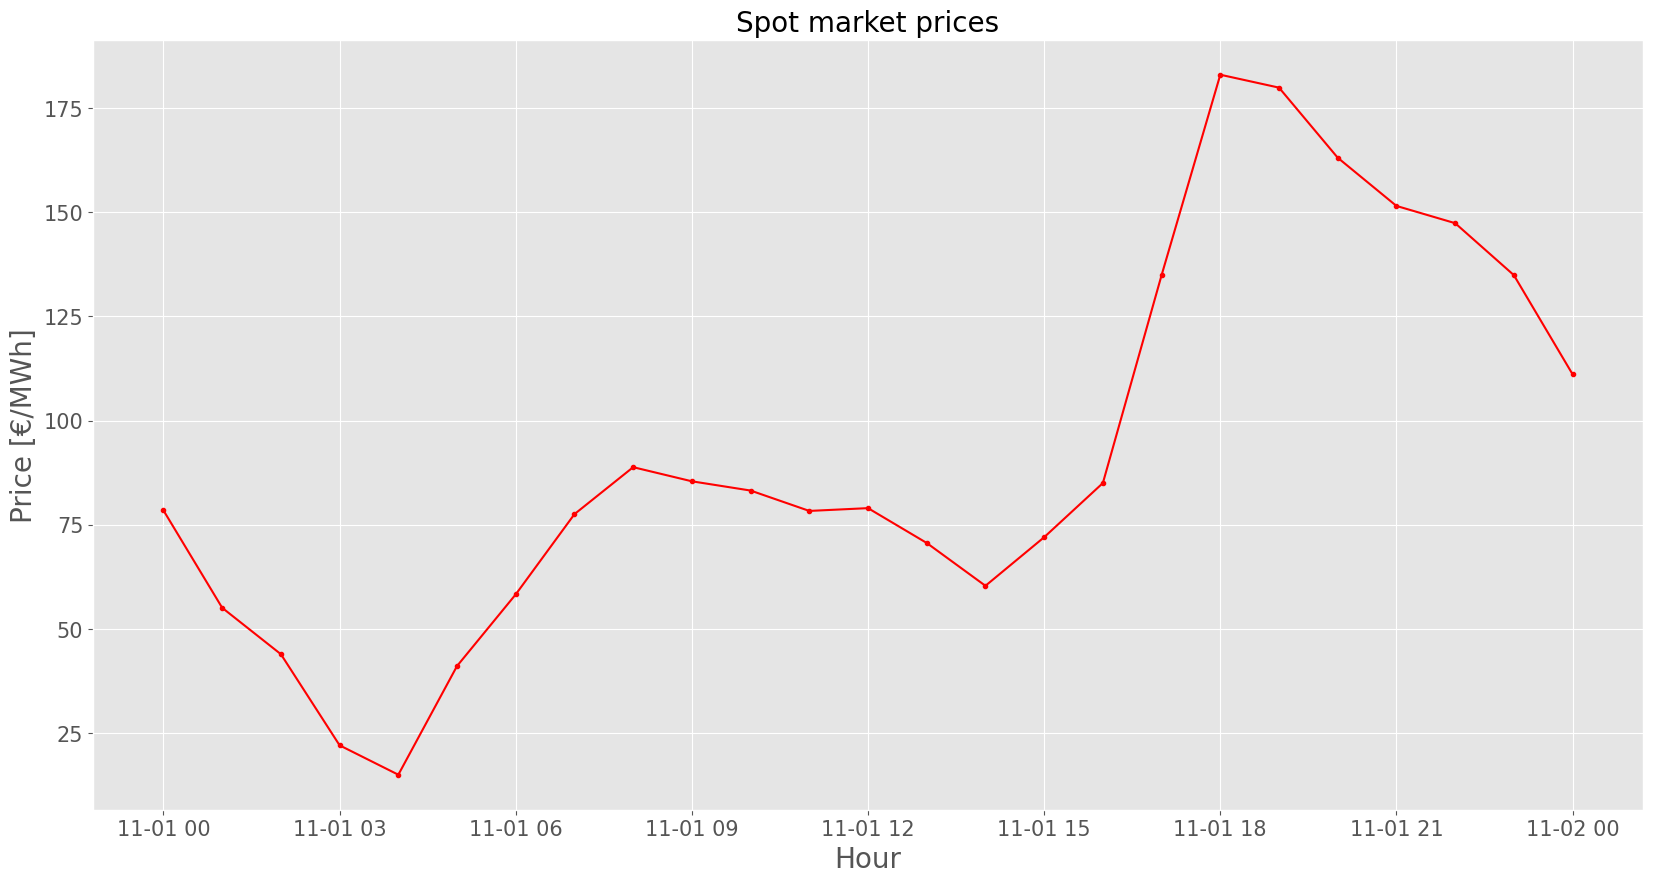

In [2064]:
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.plot(times, prices, 'r', linewidth=1.5, marker='.')
plt.title(f"Spot market prices", fontsize=20)
plt.xlabel('Hour', fontsize=20 )
plt.ylabel('Price [€/MWh]', fontsize=20)
plt.show()

### Changing Dates

We could try to change the dates and ask for more recent prices. Let's make a new request, changing the desired parameters:

In [2067]:
params = {'start_date': '2022-11-01T00:00', 'end_date': '2022-11-15T00:00', 'time_trunc':'hour'}

In [2068]:
response = requests.get(endpoint+get_archives, headers=headers, params=params)

In [2069]:
response

<Response [200]>

Let's repeat the process of extracting the data in a new structure (without plotting for brevity)

In [2071]:
data_json_new = response.json()

In [2072]:
pvpc_data_new = data_json_new['included'][0]
spot_market_data_new = data_json_new['included'][1]

pvpc_values_new = pvpc_data_new['attributes']['values']
spot_values_new = spot_market_data_new['attributes']['values']

Looking again at the spot market price only:

In [2074]:
prices_new = []
times_new = []
for data_point in spot_values_new:
    prices_new.append(data_point['value'])
    times_new.append(data_point['datetime'])

Let's plot and compare the new data

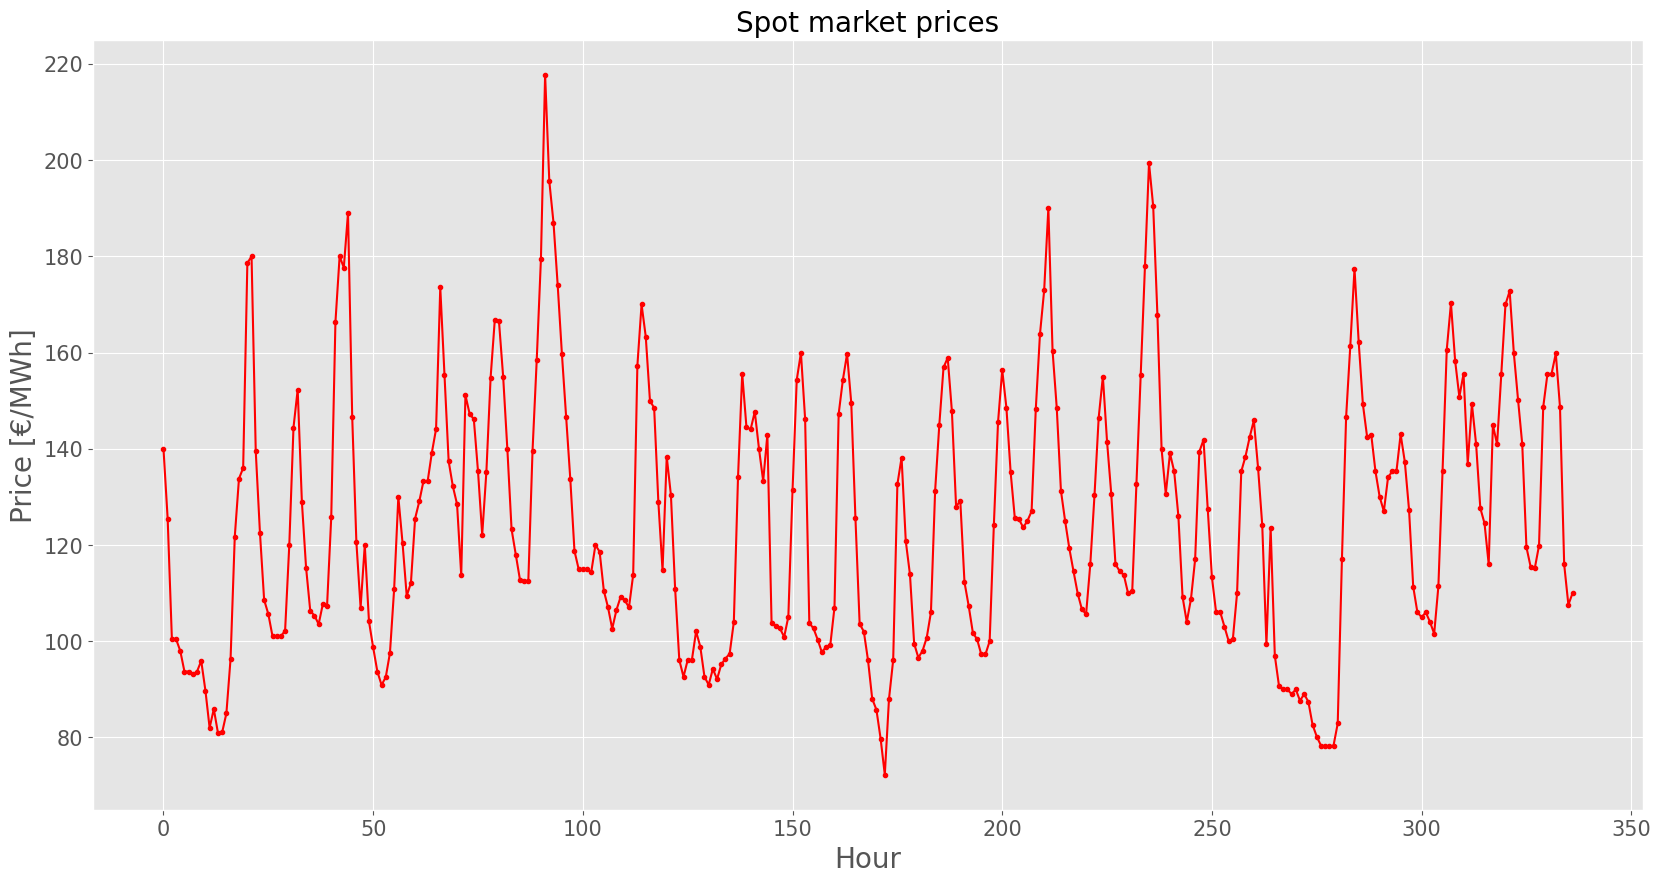

In [2076]:
plt.figure(figsize=(20,10))
plt.plot(prices_new, 'r', linewidth=1.5, marker='.')
plt.title(f"Spot market prices", fontsize=20)
plt.xlabel('Hour', fontsize=20 )
plt.ylabel('Price [€/MWh]', fontsize=20)
plt.show()

Let's look for the most updated price signals.
We need to use teh python `datetime` library for this. The approach is to generate the actual time in UTC time coordinates and add the desired time step for the analysis. Spot market prices are generated today for tomorrow and are available from 12PM when the market closes. If you are running the code after your 12PM you should be able to see DAM prices for tomorrow.

Mind that datetime objects have to be transformed into strings, follwing the required format specified in the parameters of the API documentation, otherwise it will not work.

In [2078]:
start_date = datetime.now()
end_date = start_date + timedelta(hours=24)             # add one day to see prices for tomorrow
# transform into strings with a minute resolution
end_date = end_date.strftime('%Y-%m-%dT%H:%M')
start_date = start_date.strftime('%Y-%m-%dT%H:%M')
# check
end_date

'2025-01-04T15:00'

In [2079]:
start_date

'2025-01-03T15:00'

Update the parameters of the API request with the new structures

In [2081]:
params = {'start_date': start_date, 'end_date': end_date, 'time_trunc':'hour'}
response = requests.get(endpoint+get_archives, headers=headers, params=params)
response

<Response [200]>

Extract values just as before

In [2083]:
data_json = response.json()
data_json

{'data': {'type': 'Precios mercado peninsular en tiempo real',
  'id': 'mer13',
  'attributes': {'title': 'Precios mercado peninsular en tiempo real',
   'last-update': '2025-01-02T20:46:04.000+01:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'MISS'}}},
 'included': [{'type': 'PVPC',
   'id': '1001',
   'groupId': None,
   'attributes': {'title': 'PVPC',
    'description': None,
    'color': '#ffcf09',
    'type': None,
    'magnitude': 'price',
    'composite': False,
    'last-update': '2025-01-02T20:46:04.000+01:00',
    'values': [{'value': 158.29,
      'percentage': 0.5895124948791479,
      'datetime': '2025-01-03T15:00:00.000+01:00'},
     {'value': 176.3,
      'percentage': 0.5886477462437396,
      'datetime': '2025-01-03T16:00:00.000+01:00'},
     {'value': 198.42,
      'percentage': 0.5842412107649726,
      'datetime': '2025-01-03T17:00:00.000+01:00'},
     {'value': 269.73,
      'percentage': 0.6432097293430309,
      'datetime': '2025-01-03T18:00

Let's extract the data we have


In [2085]:
spot_price = data_json["included"][1]["attributes"]["values"][0]["value"]
time_str = data_json["included"][1]["attributes"]["values"][0]["datetime"]
# from string to datetime
time = datetime.strptime(time_str[:16], '%Y-%m-%dT%H:%M') 
print(f"Spot market price at {time} is {spot_price} €/MWh")

Spot market price at 2025-01-03 15:00:00 is 110.22 €/MWh


In [2086]:
pvpc = data_json["included"][0]["attributes"]["values"][0]["value"]
time_str = data_json["included"][0]["attributes"]["values"][0]["datetime"]
# from string to datetime
time = datetime.strptime(time_str[:16], '%Y-%m-%dT%H:%M') 
print(f"Price the final consumer is paying at {time} is {pvpc} €/MWh")

Price the final consumer is paying at 2025-01-03 15:00:00 is 158.29 €/MWh


As you can see there is a big difference between the price settled by the regulator and the price in the free market!

**IMPORTANT**: asking dates prior to year 2021 will return partial data only. This is because there is a problem with the API.

This changes do happen a lot in APIs, because as said they have their own software development cycle (ciclically need maintaince) and might be subjected to change. Do always check out the API documentation to keep trace of the changes.
API are not perfect tools :) and might contain bugs, missing data, and many more...

# Part II: Exercize - REE API

### Build your own request

Looking at the REE API documentation available online, you can see the several information available (called "widget").
Each widget belong to a category. Pick the one of your interest and try to stream the desired data from the REE API.
You would need to set proper parameters for each widget.
It is important to have a deep look at the API documentation, looking for the type of information that might be of interest for you.

Set your own request parameters here below:

In [2092]:
endpoint = 'https://apidatos.ree.es'
# enter here your desired path to the resource
get_archives = '/en/datos/balance/balance-electrico'
headers = {'Accept': 'application/json',
           'Content-Type': 'application/json',
           'Host': 'apidatos.ree.es'}

params = {'start_date': '2024-01-01T00:00', 'end_date': '2025-01-01T00:00', 'time_trunc':'month'}
# choose here your desired parameters: start_date, end_date, time_trunc, geo_trunc, etc ...

Now you can make your own request

In [2094]:
response = requests.get(endpoint+get_archives, headers=headers, params=params)

Check the status of your request

In [2096]:
response
status = response.status_code

#Check the status code
if status < 200:
    print('informational')
    # If the status code is 200, treat the information.
elif status >= 200 and status < 300:
    print('Connection is established')
    #okBehavior(response) # runs the function to get list of archives
elif status >= 300 and status < 400:
    print('redirection')
elif status >= 400 and status < 500:
    print('client error')
else:
    print('server error')

Connection is established


Problem with your request? meaning any status different than 200.
Check the problem related with your request and try to fix it. Use the following:

In [2098]:
response.json()

{'data': {'type': 'Electrical energy balance',
  'id': 'bal1',
  'attributes': {'title': 'Electrical energy balance',
   'last-update': '2024-12-10T12:17:40.000+01:00',
   'description': "Electrical energy balance: Allocation of production units according to primary fuel. The self-consumption of manageable hydroelectric and non-renewable facilities is removed from their net production. In these types of generating facilities, a negative generation indicates that the hourly electricity consumption required by the power station for its operation exceeds the facility's hourly production."},
  'meta': {'cache-control': {'cache': 'HIT',
    'expireAt': '2025-02-02T10:37:44'}}},
 'included': [{'type': 'Renovable',
   'id': 'Renovable',
   'attributes': {'title': 'Renovable',
    'last-update': '2024-12-10T12:17:35.000+01:00',
    'description': None,
    'magnitude': None,
    'content': [{'type': 'Hydro',
      'id': '10288',
      'groupId': 'Renovable',
      'attributes': {'title': 'Hydr

Change parameters accordingly.



When your connection is succesfully established. Access the data by means of a json object

In [2101]:
data_json = response.json()

# Demand at busbars is the sum of the (non-) renewable generation minus the pumped hydrogen consumption and the exchange of energy
demand = None
for item in data_json['included']:
    if item['id'] == 'Demand at busbars':
        demand = item
        break
total_demand = demand['attributes']['content'][-1]['attributes']['values']


Store the data in local python structures

In [2103]:
times = []
demand_values = []
for data_point in total_demand:
    demand_values.append(data_point['value'])
    times.append(data_point['datetime'])
print(demand_values)

[22221170.25199999, 20187685.494000044, 20549272.189999986, 19180800.26200001, 19380743.50900001, 19484939.908, 22611742.433999997, 22289440.377, 19776399.751000002, 20183683.40600003, 19699642.82799999, 21472884.638999976, 24374.476]


Print the data for better visualization and analysis

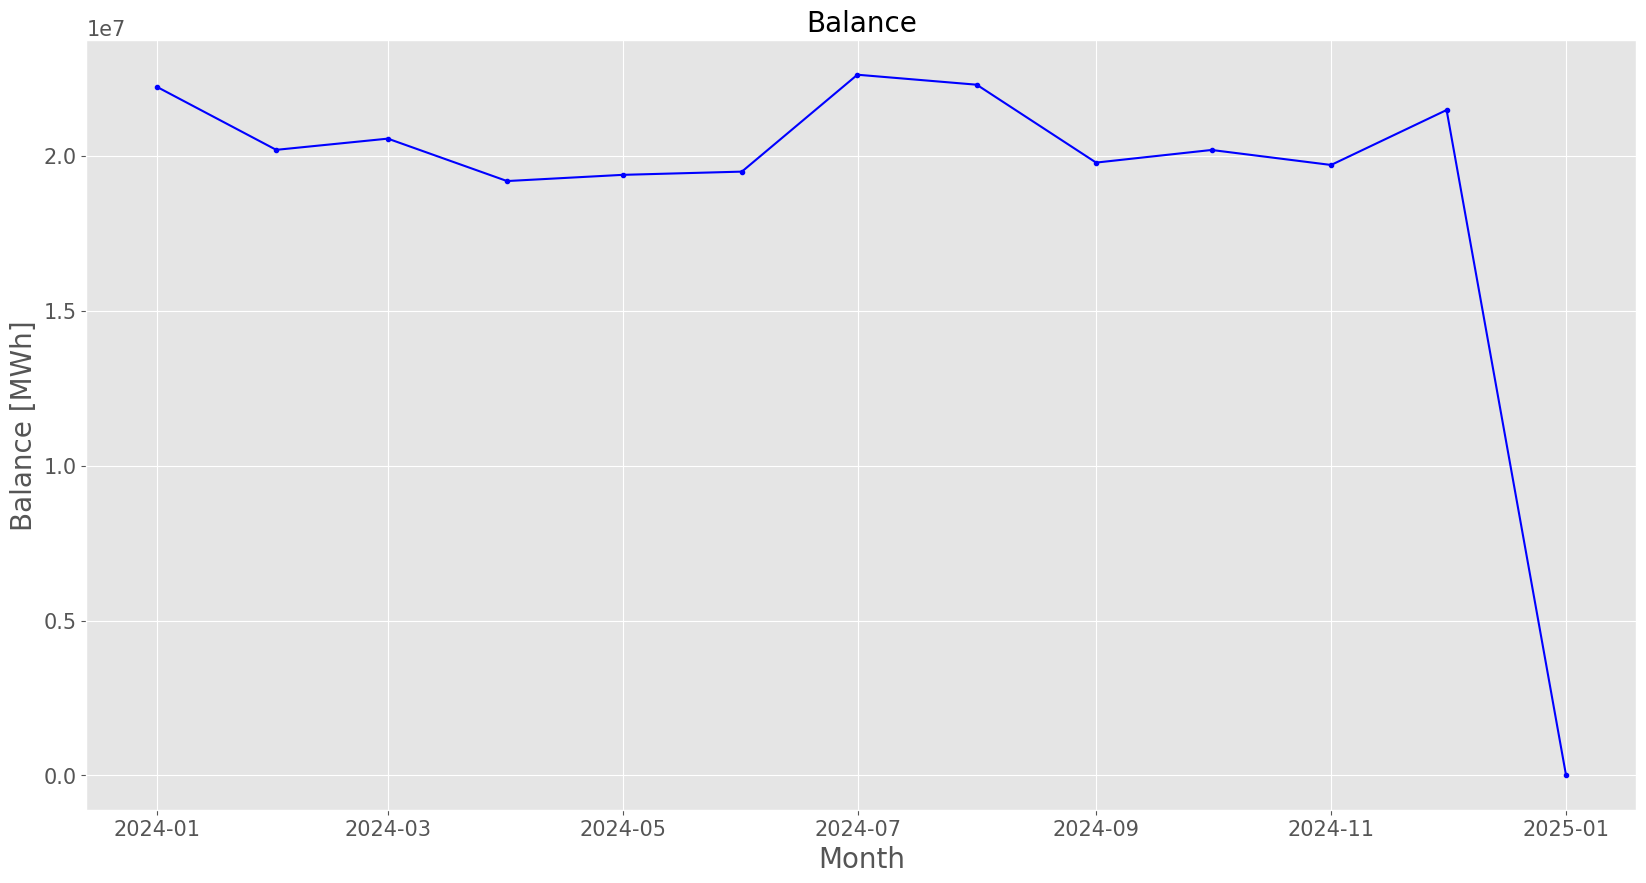

In [2105]:
times = [datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%S.%f%z") for date_str in times]
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.plot(times, demand_values, 'b', linewidth=1.5, marker='.')
plt.title(f"Balance", fontsize=20)
plt.xlabel('Month', fontsize=20 )
plt.ylabel('Balance [MWh]', fontsize=20)
plt.show()

# Part III: Exercize - REE API

Going back to the Part 1 of the lab, take the most updated prices for the spot market and the PVPC and compare them in a chart. Draw some conclusions.

In [2108]:
endpoint = 'https://apidatos.ree.es'

get_archives = '/en/datos/mercados/precios-mercados-tiempo-real'

headers = {'Accept': 'application/json',
           'Content-Type': 'application/json',
           'Host': 'apidatos.ree.es'}

In [2109]:
end_date = datetime.now()
start_date = end_date - timedelta(hours=24)             

end_date = end_date.strftime('%Y-%m-%dT%H:%M')
start_date = start_date.strftime('%Y-%m-%dT%H:%M')
start_date

'2025-01-02T15:01'

In [2110]:
end_date

'2025-01-03T15:01'

In [2111]:
params = {'start_date': start_date, 'end_date': end_date, 'time_trunc':'hour'}
response = requests.get(endpoint+get_archives, headers=headers, params=params)
response

<Response [200]>

In [2112]:
data_json = response.json()
data_json

{'data': {'type': 'Precios mercado peninsular en tiempo real',
  'id': 'mer13',
  'attributes': {'title': 'Precios mercado peninsular en tiempo real',
   'last-update': '2025-01-03T10:45:22.000+01:00',
   'description': None},
  'meta': {'cache-control': {'cache': 'MISS'}}},
 'included': [{'type': 'PVPC',
   'id': '1001',
   'groupId': None,
   'attributes': {'title': 'PVPC',
    'description': None,
    'color': '#ffcf09',
    'type': None,
    'magnitude': 'price',
    'composite': False,
    'last-update': '2025-01-03T10:45:22.000+01:00',
    'values': [{'value': 186.57,
      'percentage': 0.5721777532431687,
      'datetime': '2025-01-02T16:00:00.000+01:00'},
     {'value': 199.7,
      'percentage': 0.5655621636930047,
      'datetime': '2025-01-02T17:00:00.000+01:00'},
     {'value': 274.4,
      'percentage': 0.632870519857927,
      'datetime': '2025-01-02T18:00:00.000+01:00'},
     {'value': 277.24,
      'percentage': 0.6326358304999657,
      'datetime': '2025-01-02T19:00:0

In [2113]:
spot_price = data_json["included"][1]["attributes"]["values"]
pvpc = data_json["included"][0]["attributes"]["values"]

times = []
spot_price_values = []
pvpc_values = []
for data_point in spot_price:
    spot_price_values.append(data_point['value'])
    times.append(data_point['datetime'])

for data_point in pvpc:
    pvpc_values.append(data_point['value'])


times = [datetime.strptime(time_str, "%Y-%m-%dT%H:%M:%S.%f%z") for time_str in times]
print(f"The PVPC price is {pvpc_values[-1]} €/MWh")
print(f"The spot price is {spot_price_values[-1]} €/MWh")

The PVPC price is 158.29 €/MWh
The spot price is 110.22 €/MWh


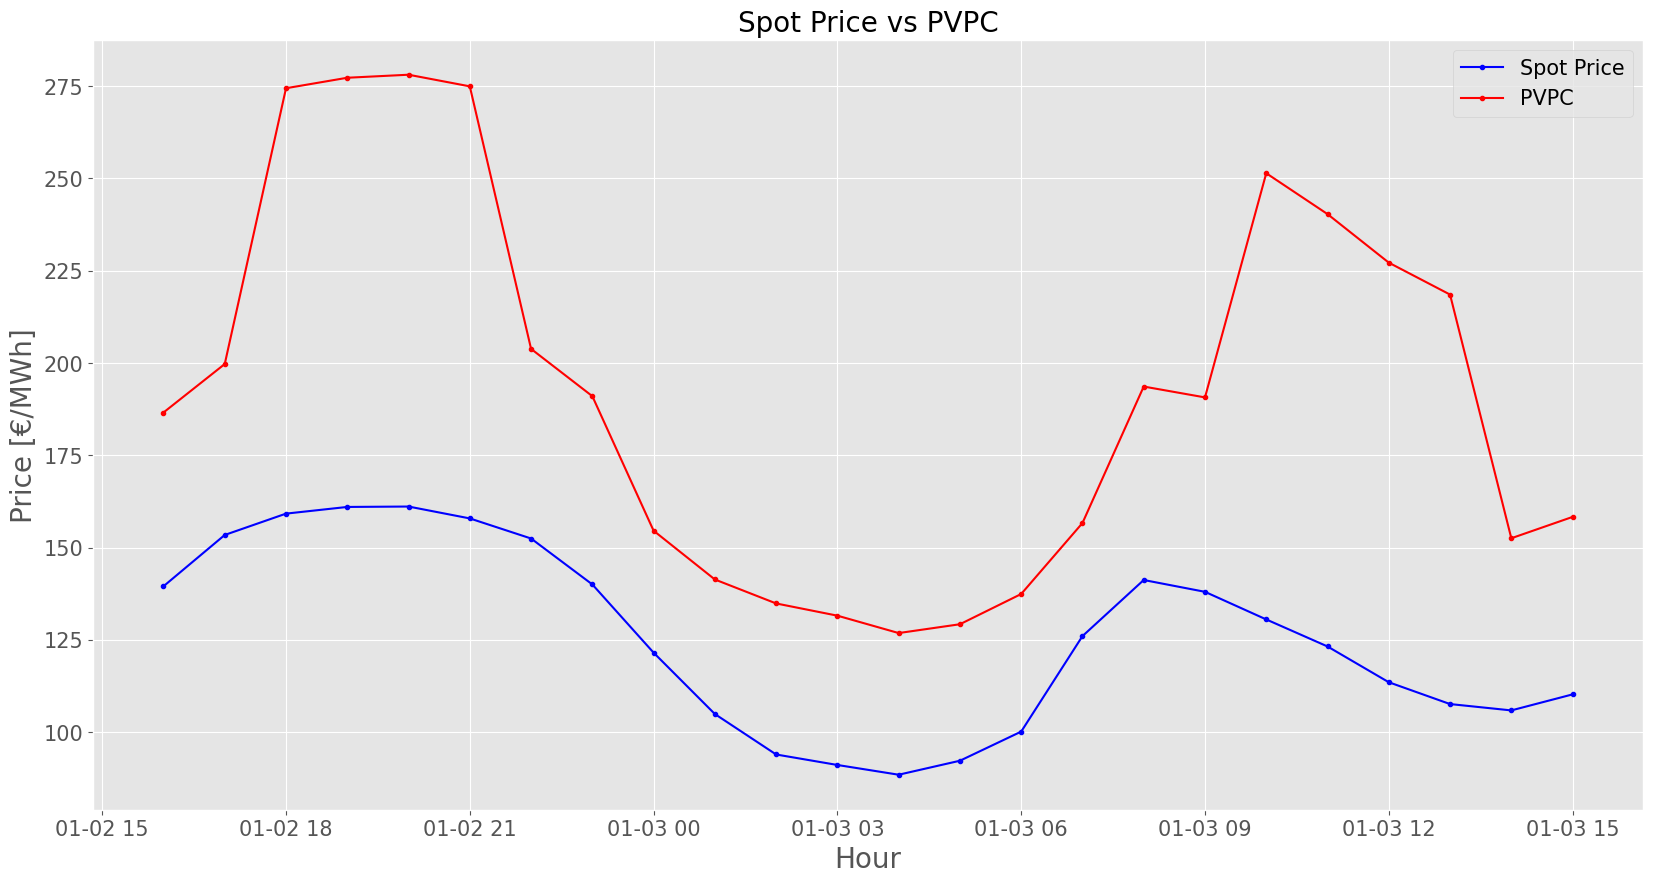

In [2114]:
matplotlib.rc('xtick', labelsize=15)     
matplotlib.rc('ytick', labelsize=15)
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.plot(times, spot_price_values, 'b', linewidth=1.5, marker='.', label='Spot Price')
plt.plot(times, pvpc_values, 'r', linewidth=1.5, marker='.', label='PVPC')
plt.title(f"Spot Price vs PVPC", fontsize=20)
plt.xlabel('Hour', fontsize=20 )
plt.ylabel('Price [€/MWh]', fontsize=20)
plt.legend(fontsize=15)
plt.show()

It can be seen that the price the customer should pay (pvpc - price of energy on regulated market) is higher than the spot price (price of energy on free market)

# Part IV: CO2 Signal API

This is a free to use API from the famous **electricitymap.org**.

You can use our API to get access to information about how much carbon is emitted when producing electricity in a country.
API documentation is available at https://docs.co2signal.com/#introduction

CO2 Signal uses API keys to allow access to the API. You can get an API key by making a request in their website.
CO2 Signal expects the API key to be included as a header in all requests to the server

### Get latest by country code

In [2119]:
my_api_token = 'QE4sZ9U7d2FcBeTQuENPlZsQ9PYeVeFG'

endpoint = 'https://api.co2signal.com'
get_archive = '/v1/latest'
headers = {'auth-token': my_api_token}
params = {'countryCode':'IT'} 

# NB: this parameters are asking data for country Italy, but you can change it, based on the info given in the API documentation

In [2120]:
response = requests.get(endpoint+get_archive, headers=headers, params=params)
response

<Response [200]>

In [2121]:
# extract the data in json format
json_data = response.json()
json_data

{'_disclaimer': "This data is the exclusive property of Electricity Maps and/or related parties. If you're in doubt about your rights to use this data, please contact api@co2signal.com",
 'status': 'ok',
 'countryCode': 'IT',
 'data': {'datetime': '2025-01-03T14:00:00.000Z',
  'carbonIntensity': 402,
  'fossilFuelPercentage': 63.029999999999994},
 'units': {'carbonIntensity': 'gCO2eq/kWh'}}

Looking both at the docs and at the json structure we can see we have 2 information available **carbon intensity** and **fossil fuel percentage** for the desired country at the latest time available.

In [2123]:
co2_intensity = json_data['data']['carbonIntensity']
ff_perc = json_data['data']['fossilFuelPercentage']
time_str = json_data['data']['datetime']
# from string to datetime
time = datetime.strptime(time_str[:16], '%Y-%m-%dT%H:%M') 

print(f"Details of energy production in country {params['countryCode']} at {time}")
print(f"Carbon Intensity: {co2_intensity}")
print(f"Fossil Fuel Percentage: {ff_perc}")

Details of energy production in country IT at 2025-01-03 14:00:00
Carbon Intensity: 402
Fossil Fuel Percentage: 63.029999999999994


# Part V: WeatherAPI.com

WeatherAPI.com is a powerful fully managed **free weather and geolocation API provider** that provides extensive APIs that range from the weather forecast, historical weather, future weather, weather alerts, air quality data, IP lookup, and astronomy through to sports, time zone, and geolocation.

The API can be found accessed in the popular API market place **RapidAPI** (https://rapidapi.com/weatherapi/api/weatherapi-com)

It is required to sign up with an account in RapidAPI to use the free API. When you did that you need to subscribe to a pricing plan for the API (the free one, of course). Take a look at the limited functionalities, you can access only a few endpoints. As you can see all of them allow for **GET** methods.

Once the subscription is active you can generate in an authomatic way the code for the request through the interface (very useful) and copypaste it to use it right away.

One of the endpoints available with the free subscription is the current weather. Let's check this out

In [2126]:
import requests

# chose the endpoint
url = "https://weatherapi-com.p.rapidapi.com/current.json"

# define the headers with the authorization token
headers = {"X-RapidAPI-Key": "6a425b2a7bmshc1f059e65b98fb7p1cdd78jsn184965114ca2",
           "X-RapidAPI-Host": "weatherapi-com.p.rapidapi.com"}

# define parameters as specified in the API documentation
querystring = {"q":"Barcelona","dt":"2022-12-25"}

#create the get request
response = requests.request("GET", url, headers=headers, params=querystring)
data_json = response.text
print(response.text)

{"location":{"name":"Barcelona","region":"Catalonia","country":"Spain","lat":41.3833,"lon":2.1833,"tz_id":"Europe/Madrid","localtime_epoch":1735912802,"localtime":"2025-01-03 15:00"},"current":{"last_updated_epoch":1735911900,"last_updated":"2025-01-03 14:45","temp_c":11.3,"temp_f":52.3,"is_day":1,"condition":{"text":"Sunny","icon":"//cdn.weatherapi.com/weather/64x64/day/113.png","code":1000},"wind_mph":8.1,"wind_kph":13.0,"wind_degree":298,"wind_dir":"WNW","pressure_mb":1019.0,"pressure_in":30.09,"precip_mm":0.0,"precip_in":0.0,"humidity":58,"cloud":0,"feelslike_c":9.8,"feelslike_f":49.6,"windchill_c":12.0,"windchill_f":53.7,"heatindex_c":13.2,"heatindex_f":55.7,"dewpoint_c":1.4,"dewpoint_f":34.5,"vis_km":10.0,"vis_miles":6.0,"uv":1.3,"gust_mph":9.8,"gust_kph":15.7}}


In [2127]:
import json
data = json.loads(data_json)
print(data)

{'location': {'name': 'Barcelona', 'region': 'Catalonia', 'country': 'Spain', 'lat': 41.3833, 'lon': 2.1833, 'tz_id': 'Europe/Madrid', 'localtime_epoch': 1735912802, 'localtime': '2025-01-03 15:00'}, 'current': {'last_updated_epoch': 1735911900, 'last_updated': '2025-01-03 14:45', 'temp_c': 11.3, 'temp_f': 52.3, 'is_day': 1, 'condition': {'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000}, 'wind_mph': 8.1, 'wind_kph': 13.0, 'wind_degree': 298, 'wind_dir': 'WNW', 'pressure_mb': 1019.0, 'pressure_in': 30.09, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 58, 'cloud': 0, 'feelslike_c': 9.8, 'feelslike_f': 49.6, 'windchill_c': 12.0, 'windchill_f': 53.7, 'heatindex_c': 13.2, 'heatindex_f': 55.7, 'dewpoint_c': 1.4, 'dewpoint_f': 34.5, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 1.3, 'gust_mph': 9.8, 'gust_kph': 15.7}}


You can now go on with the data extraction and post-processing of streaming data as you like

In [2129]:
# Extract location details
location_name = data['location']['name']
country = data['location']['country']
local_time = data['location']['localtime']

# Extract current weather details
temp_c = data['current']['temp_c']
feelslike_c = data['current']['feelslike_c']
humidity = data['current']['humidity']
wind_kph = data['current']['wind_kph']
condition_text = data['current']['condition']['text']

print(f"Location: {location_name}, {country}")
print(f"Local Time: {local_time}")
print(f"Temperature (°C): {temp_c}")
print(f"Feels Like (°C): {feelslike_c}")
print(f"Humidity: {humidity}%")
print(f"Wind (kph): {wind_kph}")
print(f"Condition: {condition_text}")

Location: Barcelona, Spain
Local Time: 2025-01-03 15:00
Temperature (°C): 11.3
Feels Like (°C): 9.8
Humidity: 58%
Wind (kph): 13.0
Condition: Sunny


In [2130]:
temp_diff = temp_c - feelslike_c
print(f"Difference between actual and feels-like: {temp_diff:.2f}°C")

Difference between actual and feels-like: 1.50°C


# Part VI: Electricity Map free API

Go to the website https://api-portal.electricitymaps.com/ and sign up with your account of preference. Confirm your email and validate your account, then go to the Getting Started section and choose the product plan option **Free Tier**. Subscrive to the free plan.

In your personal account on the API portal you need to access the *Product Catalog* and enter the *Personal Free Tier* product. Once inside, you will find yourself into the actual API Client of the free tier product. Here you can find the documentation, specyifing the endpoints and your personal API key generator (Blobr API Keys). You can also keep en eye on your requests history.

You can also check if the API service is UP and running by making a simple GET request on the dedicated endpoint. This instruction is available in the API documentation under "Health" route.

In [2134]:
# check if API is up
health_endpoint = 'https://api.electricitymap.org/health'      
# NB: this is an endpoint available withing the paid API service but you can use it without token to test the connection 

# make a small get request (no token required)
response = requests.get(health_endpoint)
response

status = response.status_code

# check the status code
if status < 200:
    print('informational')
    # If the status code is 200, treat the information.
elif status >= 200 and status < 300:
    print('Connection is established. API is UP!')
    #okBehavior(response) # runs the function to get list of archives
elif status >= 300 and status < 400:
    print('redirection')
elif status >= 400 and status < 500:
    print('client error')
else:
    print('server error')

Connection is established. API is UP!


### Check available zones 

Each token (you can use the primary token) has some zones that can be accessed, for which data are available. An endpoint is available to return all zones available if no auth-token is provided.

In [2137]:
#my_token = 'tYmqsdm22FbSg2RMasqWN1PiZOs9Mwgk' # replace with your personal API key
my_token = 'jkG9yQHIscL1a'

In [2138]:
# check for available zones
base_prod_url = "https://api.electricitymap.org/v3/zones"

# make request (this request works with no token
response = requests.get(base_prod_url)
response

<Response [200]>

In [2139]:
data_dict = response.json()

print("Country name:")
# Extract abbreviation and name of each country
for abbreviation, country_info in data_dict.items():
    country_name = country_info["zoneName"]
    print(f" {country_name}, {abbreviation}")

Country name:
 Andorra, AD
 United Arab Emirates, AE
 Afghanistan, AF
 Antigua and Barbuda, AG
 Albania, AL
 Armenia, AM
 Angola, AO
 Argentina, AR
 Austria, AT
 Australia, AU
 Lord Howe Island, AU-LH
 New South Wales, AU-NSW
 Northern Territory, AU-NT
 Queensland, AU-QLD
 South Australia, AU-SA
 Tasmania, AU-TAS
 Cape Barren Island, AU-TAS-CBI
 Flinders Island, AU-TAS-FI
 King Island, AU-TAS-KI
 Victoria, AU-VIC
 Western Australia, AU-WA
 Rottnest Island, AU-WA-RI
 Aruba, AW
 Åland Islands, AX
 Azerbaijan, AZ
 Bosnia and Herzegovina, BA
 Barbados, BB
 Bangladesh, BD
 Belgium, BE
 Burkina Faso, BF
 Bulgaria, BG
 Bahrain, BH
 Burundi, BI
 Benin, BJ
 Brunei, BN
 Bolivia, BO
 Brazil, BR
 Central Brazil, BR-CS
 North Brazil, BR-N
 North-East Brazil, BR-NE
 South Brazil, BR-S
 Bahamas, BS
 Bhutan, BT
 Botswana, BW
 Belarus, BY
 Belize, BZ
 Alberta, CA-AB
 British Columbia, CA-BC
 Manitoba, CA-MB
 New Brunswick, CA-NB
 Labrador, CA-NL-LB
 Newfoundland, CA-NL-NF
 Nova Scotia, CA-NS
 Northwest

### Live Power Breakdown

Checking the API documentation different endpoints can be found to gather different type of data. For each of them, the possible HTTP requests are listed. Methods are almost always **GET** to stream the data.
Let's have a look at the *live power breakdown*.

In [2142]:
live_power_endpoint = "https://api.electricitymap.org/v3/power-breakdown/history"

The header section is always used for the authorization token (in this case).

In [2144]:
headers = {'auth-token': my_token}

Parameters to be specified are listed in the documentation.

In [2146]:
params = {'zone': "IT"}

Let's create the request and extract the data

In [2148]:
response = requests.get(live_power_endpoint, headers=headers, params=params)
response.json()

{'zone': 'IT',
 'history': [{'zone': 'IT',
   'datetime': '2025-01-02T15:00:00.000Z',
   'updatedAt': '2025-01-03T13:45:25.531Z',
   'createdAt': '2024-12-30T15:46:44.408Z',
   'powerConsumptionBreakdown': {'nuclear': 2487,
    'geothermal': 645,
    'biomass': 549,
    'coal': 1771,
    'wind': 142,
    'solar': 2744,
    'hydro': 5313,
    'gas': 15903,
    'oil': 235,
    'unknown': 4998,
    'hydro discharge': 711,
    'battery discharge': 0},
   'powerProductionBreakdown': {'nuclear': None,
    'geothermal': 648,
    'biomass': 488,
    'coal': 1757,
    'wind': 0,
    'solar': 2688,
    'hydro': 4828,
    'gas': 15764,
    'oil': 232,
    'unknown': 5003,
    'hydro discharge': 506,
    'battery discharge': None},
   'powerImportBreakdown': {'AT': 53,
    'CH': 425,
    'FR': 3260,
    'GR': 0,
    'ME': 35,
    'MT': 0,
    'SI': 0,
    'FR-COR': 0},
   'powerExportBreakdown': {'AT': 0,
    'CH': 0,
    'FR': 0,
    'GR': 64,
    'ME': 0,
    'MT': 18,
    'SI': 75,
    'FR-COR'

Let's extract the data and try to visualize

In [2150]:
hystorical_data = response.json()["history"]
hystorical_data

[{'zone': 'IT',
  'datetime': '2025-01-02T15:00:00.000Z',
  'updatedAt': '2025-01-03T13:45:25.531Z',
  'createdAt': '2024-12-30T15:46:44.408Z',
  'powerConsumptionBreakdown': {'nuclear': 2487,
   'geothermal': 645,
   'biomass': 549,
   'coal': 1771,
   'wind': 142,
   'solar': 2744,
   'hydro': 5313,
   'gas': 15903,
   'oil': 235,
   'unknown': 4998,
   'hydro discharge': 711,
   'battery discharge': 0},
  'powerProductionBreakdown': {'nuclear': None,
   'geothermal': 648,
   'biomass': 488,
   'coal': 1757,
   'wind': 0,
   'solar': 2688,
   'hydro': 4828,
   'gas': 15764,
   'oil': 232,
   'unknown': 5003,
   'hydro discharge': 506,
   'battery discharge': None},
  'powerImportBreakdown': {'AT': 53,
   'CH': 425,
   'FR': 3260,
   'GR': 0,
   'ME': 35,
   'MT': 0,
   'SI': 0,
   'FR-COR': 0},
  'powerExportBreakdown': {'AT': 0,
   'CH': 0,
   'FR': 0,
   'GR': 64,
   'ME': 0,
   'MT': 18,
   'SI': 75,
   'FR-COR': 33},
  'fossilFreePercentage': 35,
  'renewablePercentage': 28,
  'p

In [2151]:
import pandas as pd

# create separated dataframes to store variables with multiple fields

selected = ['powerConsumptionBreakdown', 'powerProductionBreakdown', 'powerImportBreakdown', 'powerExportBreakdown']
powerConsumptionBreakdown_df = pd.DataFrame(columns=['nuclear','geothermal','biomass','coal','wind','solar','hydro','gas','oil','unknown','hydro discharge','battery discharge'])
powerProductionBreakdown_df = pd.DataFrame(columns=['nuclear','geothermal','biomass','coal','wind','solar','hydro','gas','oil','unknown','hydro discharge','battery discharge'])
powerImportBreakdown_df = pd.DataFrame(columns=['AT','CH','FR','GR','ME','MT','SI','FR-COR'])
powerExportBreakdown_df = pd.DataFrame(columns=['AT','CH','FR','GR','ME','MT','SI','FR-COR'])
date_strings = list()

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

for i, time_step in enumerate(hystorical_data):
    powerConsumptionBreakdown_df.loc[i] = time_step['powerConsumptionBreakdown']
    powerProductionBreakdown_df.loc[i] = time_step['powerProductionBreakdown']
    powerImportBreakdown_df.loc[i] = time_step['powerImportBreakdown']
    powerExportBreakdown_df.loc[i] = time_step['powerExportBreakdown']
    date_strings.append(time_step['datetime'])

# Convert strings to datetime objects
date_time = [
    datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%S.%fZ") for date_str in date_strings
]
powerConsumptionBreakdown_df


,nuclear,geothermal,biomass,coal,wind,solar,hydro,gas,oil,unknown,hydro discharge,battery discharge
0,2487,645,549,1771,142,2744,5313,15903,235,4998,711,0
1,2119,646,582,1871,121,81,6276,16560,243,5184,1199,0
2,1701,647,591,1947,129,4,6965,16906,248,5305,1640,0
3,1690,648,596,2000,175,0,6935,17003,251,5308,1609,0
4,1862,649,588,2001,208,0,6110,16684,246,5144,1115,0
5,2079,650,580,1921,208,0,5101,15794,238,4846,686,1
6,1865,651,584,1901,254,0,4312,14644,230,4540,413,1
7,2425,650,738,2355,860,0,4271,13608,214,4238,341,0
8,1902,647,585,1871,325,0,3476,12098,193,3871,72,0
9,1922,651,578,1811,325,0,3200,11514,188,3672,56,0


In [2152]:
powerProductionBreakdown_df

,nuclear,geothermal,biomass,coal,wind,solar,hydro,gas,oil,unknown,hydro discharge,battery discharge
0,None,648,488,1757,0,2688,4828,15764,232,5003,506,None
1,None,649,490,1829,0,68,5675,16435,241,5149,909,None
2,None,650,492,1889,0,0,6398,16819,247,5264,1336,None
3,None,651,493,1911,0,0,6380,16868,248,5266,1355,None
4,None,652,494,1878,0,0,5579,16493,244,5115,948,None
5,None,653,495,1812,0,0,4612,15627,235,4825,552,None
6,None,653,495,1741,0,0,3894,14462,226,4520,304,None
7,None,654,494,1674,0,0,3436,13035,206,4164,121,None
8,None,654,496,1615,0,0,3102,11944,191,3880,-99,None
9,None,655,496,1560,0,0,2890,11474,188,3714,-301,None


Visualize the results

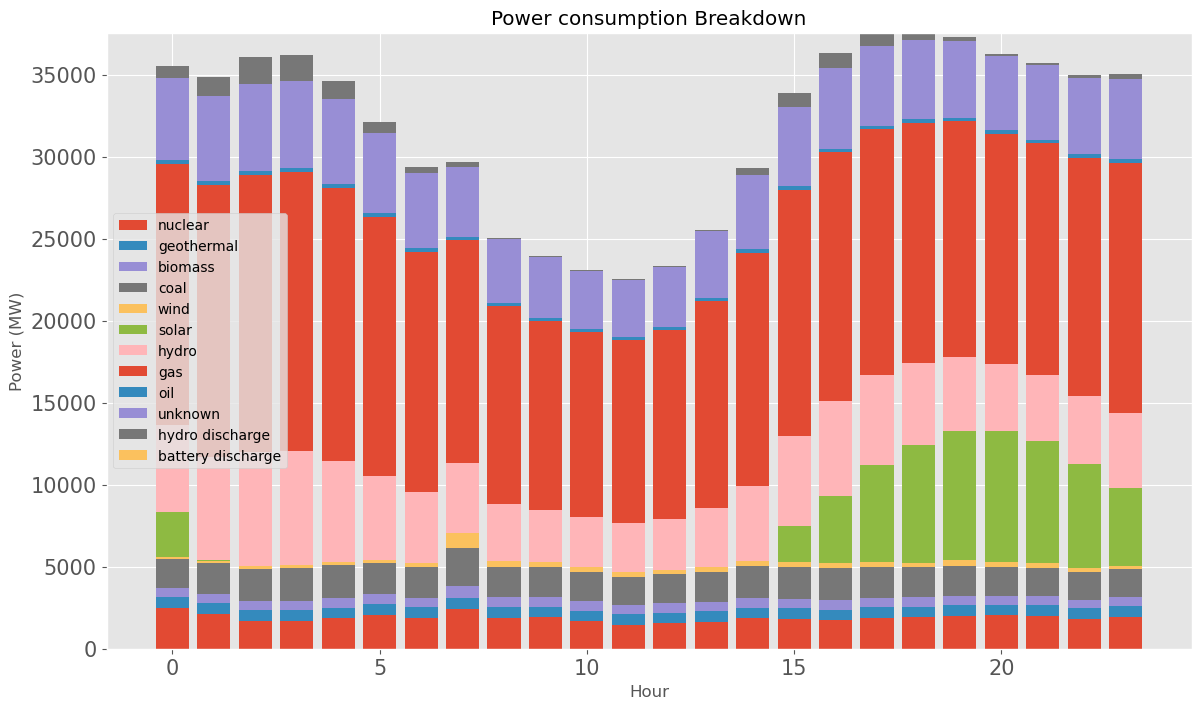

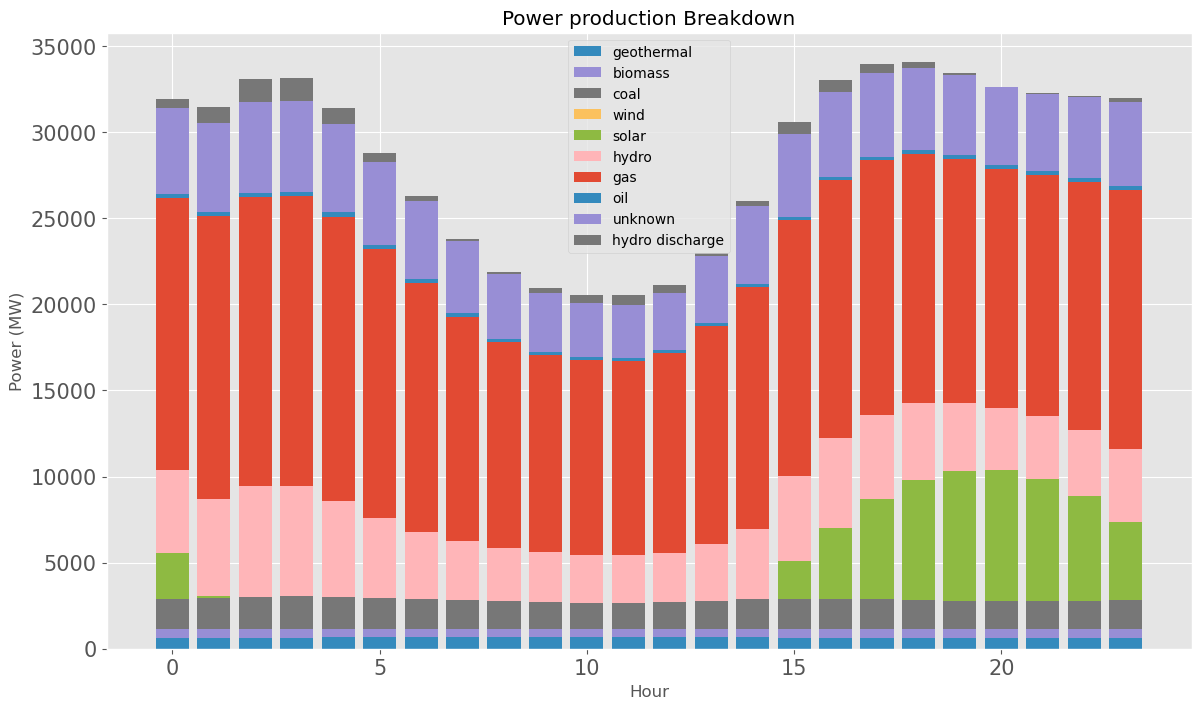

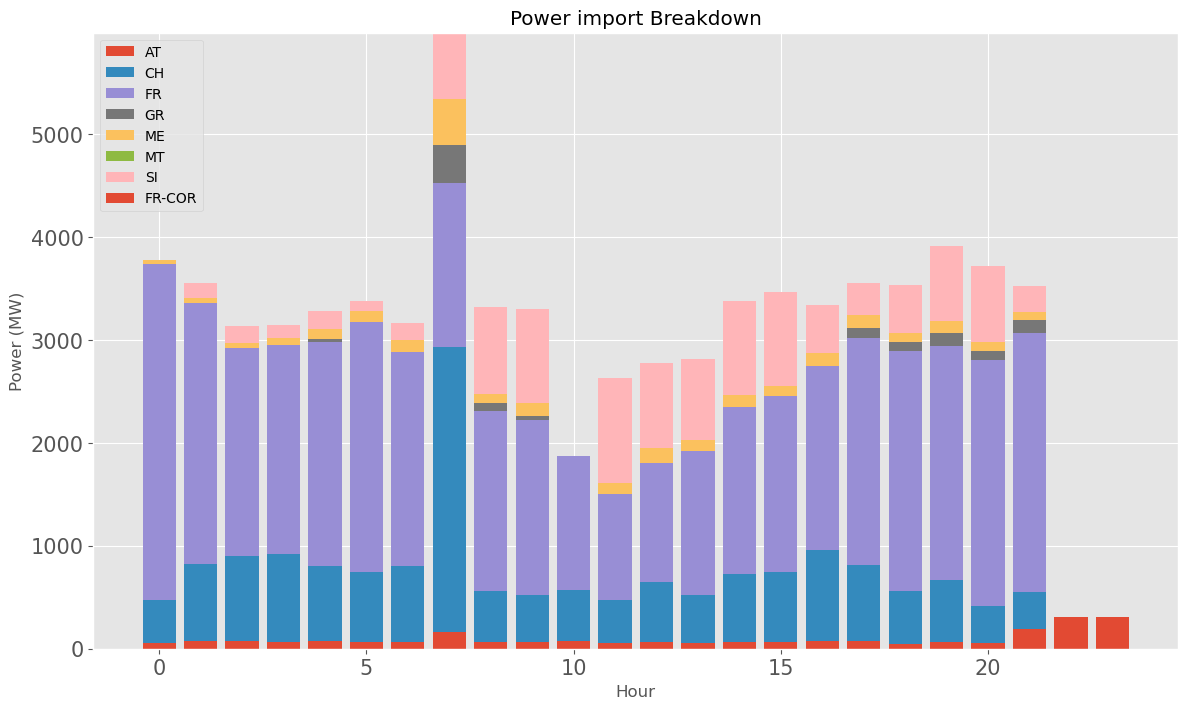

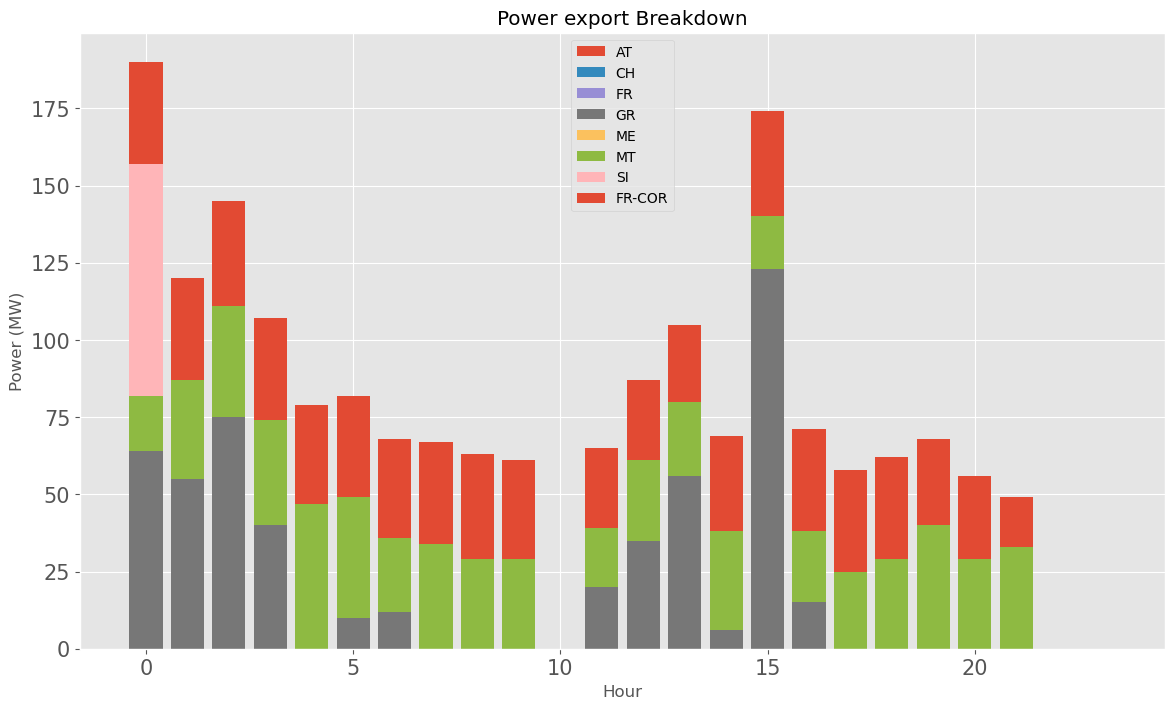

In [2154]:
def stacked_bar_chart(df, title):

    plt.figure(figsize=(14, 8))
    num_hours = len(df)

    # Plot a stacked bar chart for all columns
    bottom = 0
    for column in df.columns:
        # NB: not all the values are always present therefore a try\except block is needed
        try:
            plt.bar(range(num_hours), df[column], label=column, bottom=bottom)
            bottom += df[column]
        except:
            continue

    plt.xlabel('Hour')
    plt.ylabel('Power (MW)')
    plt.title(title)
    plt.legend()
    plt.show()

stacked_bar_chart(powerConsumptionBreakdown_df, 'Power consumption Breakdown')
stacked_bar_chart(powerProductionBreakdown_df, 'Power production Breakdown')
stacked_bar_chart(powerImportBreakdown_df, 'Power import Breakdown')
stacked_bar_chart(powerExportBreakdown_df, 'Power export Breakdown')

Now choose and endpoint of your choice, explore the data available and visualize it in a proper way.

# Part VII: choose your desired API 

Connect to the RapidAPI website (https://rapidapi.com/hub) and take a free API of your choice and start experimenting. Have Fun! :)

In [2158]:
import requests
import json
from IPython.display import HTML

url = "https://linkedin-data-api.p.rapidapi.com/search-jobs"

querystring = {"keywords":"energy engineer","locationId":"100565514","datePosted":"anyTime","jobType":"fullTime","experienceLevel":"entryLevel","onsiteRemote":"hybrid","sort":"mostRelevant"}

headers = {
	"x-rapidapi-key": "4891ada879msh2df5f4e55651a2cp1eef8bjsn3946c3dbe6ab",
	"x-rapidapi-host": "linkedin-data-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()

In [2159]:
# Visualize results
jobs = data.get('data', [])

In [2160]:
def create_img_tag(logo_url):
    if logo_url:
        return f'<img src="{logo_url}" width="100" />'
    return ''

records = []
for job in jobs:
    company_info = job.get('company', {})
    logo_url = company_info.get('logo', '')
    
    records.append({
        'ID': job.get('id', ''),
        'Title': job.get('title', ''),
        'Company Name': company_info.get('name', ''),
        'Location': job.get('location', ''),
        'Posted At': job.get('postAt', ''),
        'URL': job.get('url', ''),
        'Logo': create_img_tag(logo_url)
    })

In [2161]:
df = pd.DataFrame(records)

In [2162]:
html_table = df.to_html(index=False, escape=False)
HTML(html_table)

ID,Title,Company Name,Location,Posted At,URL,Logo (img)
4046727362,Energy Engineer - HVAC Energy Optimization & Asset Performance (m/f/x),Siemens,"Beersel, Flemish Region, Belgium (Hybrid)",,https://www.linkedin.com/jobs/view/4046727362,
4057999053,Energy & Utilities Engineer,Agidens,"Beerse, Flemish Region, Belgium (Hybrid)",2024-10-24 22:00:00 +0000 UTC,https://www.linkedin.com/jobs/view/4057999053,
4085524776,Sales Engineer - Industrial Energy,GT Connex,"Brussels, Brussels Region, Belgium (Hybrid)",2024-11-26 05:28:31 +0000 UTC,https://www.linkedin.com/jobs/view/4085524776,
